In [1]:
from pyteomics import mgf
import pandas as pd
import numpy as np
import glob as glob
import os
import matplotlib.pyplot as plt
import networkx as nx
import pingouin as pg
import seaborn as sns
sys.path.insert(0,'/global/homes/b/bpb/repos/metatlas')
from metatlas.io import feature_tools as ft

In [2]:
# G = nx.read_graphml('../data/structural_clusters_network.graphml')
G = nx.read_graphml('/global/homes/b/bpb/repos/scndb/build/CarbonNetwork.graphml')
df = dict(G.nodes(data=True))
df = pd.DataFrame(df).T
df.index.name = 'node_id'
df.reset_index(inplace=True,drop=False)
df.to_csv('CarbonNetwork-NodeData.csv',index=None)
print(df.shape)
df.columns

(7359, 48)


Index(['node_id', 'original_index', 'massive_id', 'no_extension_basename',
       'precursor_mz', 'isolated_precursor_mz', 'rt',
       'coisolated_precursor_count', 'predicted_formula', 'estimated_fdr',
       'predicted_mass', 'mass_error', 'num_mdm_frags', 'max_score_identity',
       'best_match_method_identity', 'max_matches_identity', 'name_identity',
       'inchi_key_identity', 'smiles_identity', 'formula_identity',
       'precursor_mz_identity', 'original_p2d2_index_identity',
       'isin_fticr_formula', 'dbe', 'dbe_ai', 'dbe_ai_mod', 'ai_mod', 'ai',
       'nosc', 'h_to_c', 'o_to_c', 'n_to_c', 'p_to_c', 'c', 'h', 'o', 'n', 's',
       'p', 'class_results', 'superclass_results', 'pathway_results',
       'class_results_propagated', 'superclass_results_propagated',
       'pathway_results_propagated', 'title', 'description', 'n_to_p'],
      dtype='object')

In [3]:
df['pathway_results_propagated'].value_counts()

pathway_results_propagated
Amino acids and Peptides           1523
Shikimates and Phenylpropanoids    1129
Fatty acids                        1119
Terpenoids                          404
Polyketides                         135
Alkaloids                            60
Carbohydrates                        15
Name: count, dtype: int64

In [4]:
file = '/global/cfs/cdirs/metatlas/raw_data/egsb/20240125_EB_MdR_101544-059_WAVESTAB3_20231222_EXP120A_C18-EP_USDAY72349'
files = glob.glob(os.path.join(file,'*NEG*.h5'))
files = [f for f in files if not 'exctrl' in f.lower()]
files = [f for f in files if not 'qc' in f.lower()]
files = [f for f in files if  '6uL_' in f]
# files = [f for f in files if  'Hi' in f]
# files = [f for f in files if ('water' in f) | ('MeOH' in f)]


# file = '/global/cfs/cdirs/metatlas/raw_data/egsb/20231018_EB_MdR_109570-002_WAVEstab_20231017_EXP120A_C18-EP_USDAY72349_vols'
# files2 = glob.glob(os.path.join(file,'*NEG*.h5'))
# files2 = [f for f in files2 if not 'exctrl' in f.lower()]
# files2 = [f for f in files2 if not 'qc' in f.lower()]
# files2 = [f for f in files2 if  '6uL_' in f]
# files2 = [f for f in files2 if  'NLDM' in f]


# files = files + files2

files = pd.DataFrame(files,columns=['filename'])
# files = files[files['filename'].isin(files_to_use)]
files['experiment'] = files['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[4:6]))
files['sampletype'] = files['filename'].apply(lambda x: x.split('/')[-1].split('_')[12])
# # files['sampletype'] = files['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[12:15]))
# print(files['experiment'].unique())
# # experiments = ['Permafrost_pilot', 'SoilWetDry_final',
#        # 'GEODES_All3', 'FRCgw2_20230830','OMTSoil50g_Pilot']
# files = files[files['sampletype'].str.contains('NatCom')]

sorted(files['sampletype'].unique())

# hi is 0.5x nldm; lo is 0.05x nldm; and NA is no nldm
# sterile is not sterile

#  'supern-CentExp-OMT1d2-Sterile-d7-NA'
# sterile control at d7 eluted with salt-buffer-viatmin aqueous (same for all samples)
# incubated at room temp for 7 days (same as all samples)

#  'supern-CentExp-OMT1d2-NatCom-d0-Hi',
# not incubated but has microbes and NLDM at 0.5x for 0 days

#  'supern-CentExp-OMT1d2-NatCom-d7-Hi',
# incubated with microbes and NLDM at 0.5x for 7 days

# observations so far
# d7 vs d0 Hi NLDM makes as many things as are deplteted as are made
# potting soil this was not the case.  things were depleted.

# test if not nothing was eated from teh OMT soil

# keep_groups = ['supern-CentExp-OMT1d2-Sterile-d7-NA','supern-CentExp-OMT1d2-NatCom-d0-Hi','supern-CentExp-OMT1d2-NatCom-d7-Hi']
# files = files[files['sampletype'].isin(keep_groups)]

# files
files

,filename,experiment,sampletype
0,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Lo
1,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d0-NA
2,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-Sterile-d0-NA
3,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,custom-H2O-NA-NA-NA-NA
4,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-Sterile-d0-NA
5,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-Sterile-d0-Hi
6,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,custom-H2O-NA-NA-NA-NA
7,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Hi
8,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-NA
9,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d0-Hi


In [5]:
# files = files[files['sampletype'].str.contains('OMT1d2')]

/global/common/software/m2650/msbuddy/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
ppm_tolerance = 5
mz_tol = 0.002
rt_min = 1
rt_max = 8

atlas = df[['node_id','precursor_mz']].copy()
atlas.rename(columns={'precursor_mz':'mz','node_id':'label'},inplace=True)
atlas['rt_min'] = rt_min
atlas['rt_max'] = rt_max
atlas['mz_tolerance'] = mz_tol
atlas['rt_tolerance'] = 100
atlas['ppm_tolerance'] = ppm_tolerance
atlas['extra_time'] = 0
atlas['rt_peak'] = (rt_min+rt_max)/2  
atlas['group_index'] = ft.group_consecutive(atlas['mz'].values[:],
                                    stepsize=ppm_tolerance,
                                    do_ppm=True)

out = []
counter = 0
for f in files['filename']:
    try:
        d = ft.get_atlas_data_from_file(f,atlas,desired_key='ms1_neg')
    except:
        print('Can not read',f)
        continue
    d = d[d['in_feature']==True].groupby('label').apply(ft.calculate_ms1_summary).reset_index()
    d['filename'] = f
    out.append(d)
    counter += 1
    print(counter)
out = pd.concat(out)
out.rename(columns={'label':'node_id'},inplace=True)

out

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


,node_id,num_datapoints,peak_area,peak_height,mz_centroid,rt_peak,filename
0,0.0,254.0,6.570372e+07,1.220651e+06,200.128891,3.756429,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
1,1.0,1562.0,1.026955e+09,5.473598e+06,163.039730,3.307318,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
2,10.0,1150.0,4.556866e+08,6.353160e+06,165.018910,2.548210,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
3,100.0,673.0,4.704220e+08,4.454307e+06,153.019024,2.529592,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
4,10001.0,562.0,1.142768e+08,1.384922e+06,338.169758,5.213948,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
...,...,...,...,...,...,...,...
5170,9981.0,12.0,1.865005e+05,2.719396e+04,403.070124,5.401802,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
5171,9983.0,8.0,9.726034e+04,2.125339e+04,364.147513,4.813591,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
5172,999.0,1064.0,5.972588e+07,1.479939e+05,163.039819,4.669055,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...
5173,9991.0,19.0,3.759144e+06,4.169595e+05,463.137698,7.790306,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...


In [7]:
out['experiment'] = out['filename'].apply(lambda x: '_'.join(x.split('/')[-1].split('_')[4:6]))
out['sampletype'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12])
out['time'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-2])
out['community'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-3])
out['supplement'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-1])
out
# out['sampletype1'] = out['filename'].apply(lambda x: '-'.join(x.split('/')[-1].split('_')[12].split('-')[1:]))
# # out['sampletype2'] = out['filename'].apply(lambda x: x.split('/')[-1].split('_')[14].split('-')[3])
# g = out.groupby('filename')['peak_area'].median()
# g.sort_values(ascending=False,inplace=True)
# g.head(20).to_csv('ones_that_are_big.csv')

,node_id,num_datapoints,peak_area,peak_height,mz_centroid,rt_peak,filename,experiment,sampletype,time,community,supplement
0,0.0,254.0,6.570372e+07,1.220651e+06,200.128891,3.756429,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Lo,d7,NatCom,Lo
1,1.0,1562.0,1.026955e+09,5.473598e+06,163.039730,3.307318,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Lo,d7,NatCom,Lo
2,10.0,1150.0,4.556866e+08,6.353160e+06,165.018910,2.548210,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Lo,d7,NatCom,Lo
3,100.0,673.0,4.704220e+08,4.454307e+06,153.019024,2.529592,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Lo,d7,NatCom,Lo
4,10001.0,562.0,1.142768e+08,1.384922e+06,338.169758,5.213948,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,supern-CentExp-OMT1d2-NatCom-d7-Lo,d7,NatCom,Lo
...,...,...,...,...,...,...,...,...,...,...,...,...
5170,9981.0,12.0,1.865005e+05,2.719396e+04,403.070124,5.401802,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,custom-H2O-NA-NA-NA-NA,NA,NA,NA
5171,9983.0,8.0,9.726034e+04,2.125339e+04,364.147513,4.813591,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,custom-H2O-NA-NA-NA-NA,NA,NA,NA
5172,999.0,1064.0,5.972588e+07,1.479939e+05,163.039819,4.669055,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,custom-H2O-NA-NA-NA-NA,NA,NA,NA
5173,9991.0,19.0,3.759144e+06,4.169595e+05,463.137698,7.790306,/global/cfs/cdirs/metatlas/raw_data/egsb/20240...,WAVESTAB3_20231222,custom-H2O-NA-NA-NA-NA,NA,NA,NA


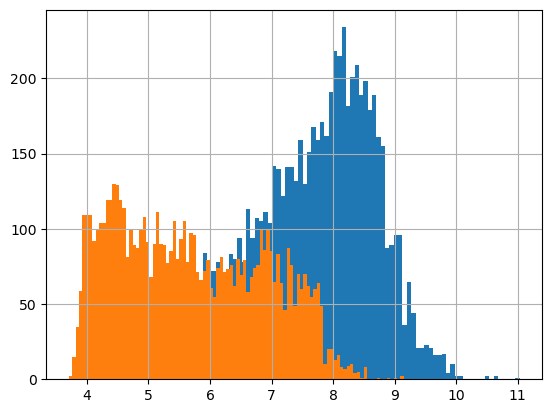

In [8]:
d_sample = out[out['time']!='NA'].pivot_table(columns='node_id',index=['time','community','supplement'],values='peak_area',aggfunc='mean',fill_value=300)
d_control = out[out['time']=='NA'].pivot_table(columns='node_id',index=['time','community','supplement'],values='peak_area',aggfunc='mean',fill_value=300)
fig,ax = plt.subplots()
d_sample.max().apply(np.log10).hist(ax=ax,bins=100,label='sample')
d_control.max().apply(np.log10).hist(ax=ax,bins=100,label='control')
max_sample = d_sample.max()
min_sample = d_sample.min()
idx = (max_sample>5e6) #& ((max_sample/min_sample)>5)

d_sample = d_sample[max_sample[idx].index]


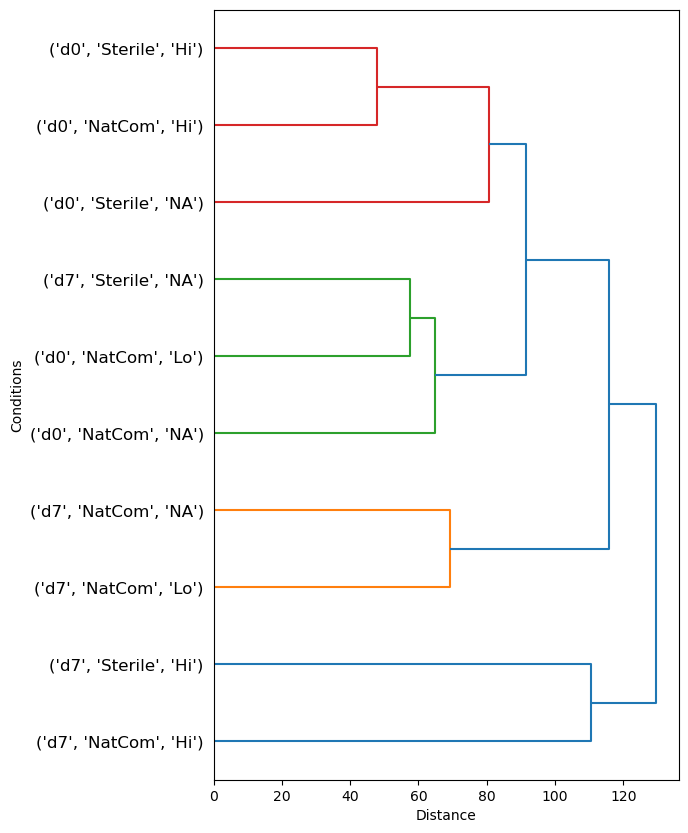

In [9]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Normalize the columns of d_sample
scaler = StandardScaler()
d_sample_scaled = scaler.fit_transform(d_sample)

# Compute the distance matrix
d_sample_dist = sch.distance.pdist(d_sample_scaled)

# Perform hierarchical clustering
d_sample_linkage = sch.linkage(d_sample_dist, method='average')
labels = list(map(str, d_sample.index.tolist()))

# Plot the dendrogram
plt.figure(figsize=(6, 10))
sch.dendrogram(d_sample_linkage,labels=labels,orientation='right')
plt.xlabel('Distance')
plt.ylabel('Conditions')
# plt.title('Dendrogram of d_sample')
plt.show()



In [11]:
d_sample.head()

node_id                          100.0       10016.0     10052.0  \
time community supplement                                          
d0   NatCom    Hi           69156728.0  7.324047e+06  74391194.0   
               Lo          188721668.0  3.210762e+06  71348707.0   
               NA          287696620.0  8.455732e+06  74697582.0   
     Sterile   Hi          107999116.0  1.406507e+07  72517732.0   
               NA          114374558.0  6.726804e+06  66956811.0   

node_id                         10147.0       10165.0         1020.0  \
time community supplement                                              
d0   NatCom    Hi          2.193210e+06  5.201116e+06  210753.731771   
               Lo          1.956607e+06  8.761014e+06  275052.011719   
               NA          1.831670e+06  1.168898e+07  196459.134766   
     Sterile   Hi          1.771662e+06  5.341671e+06  236928.895833   
               NA          1.977645e+06  1.189862e+07  383961.567708   

node_id                         10201.0       1021.0       10227.0  \
time community supplement                                            
d0   NatCom    Hi          3.653721e+08  337899024.0  2.580088e+05   
               Lo          9.179418e+08  232766624.0  8.896946e+05   
               NA          1.034226e+09  226062132.0  1.229001e+06   
     Sterile   Hi          3.132491e+08  347824536.0  2.148733e+05   
               NA          6.507998e+08  164058048.0  6.861250e+05   

node_id                          1025.0  ...        9775.0        9800.0  \
time community supplement                ...                               
d0   NatCom    Hi          2.924829e+08  ...  1.323122e+06  5.935944e+06   
               Lo          7.253910e+08  ...  1.070482e+07  5.634681e+05   
               NA          1.036148e+09  ...  1.272493e+07  3.000000e+02   
     Sterile   Hi          5.249312e+08  ...  9.802595e+05  6.477686e+06   
               NA          4.646253e+08  ...  7.934113e+06  3.000000e+02   

node_id                          9802.0         982.0        9865.0  \
time community supplement                                             
d0   NatCom    Hi          1.519922e+09  1.269876e+09  74968.935547   
               Lo          7.683809e+07  1.212297e+09    300.000000   
               NA          2.366319e+07  1.252771e+09  46176.539062   
     Sterile   Hi          1.502294e+09  1.263674e+09  81514.759115   
               NA          2.240759e+07  1.254300e+09  26736.021484   

node_id                          9878.0         988.0        9895.0  \
time community supplement                                             
d0   NatCom    Hi          1.773077e+06  6.892808e+06  4.875268e+07   
               Lo          2.348498e+06  1.045727e+07  1.644696e+05   
               NA          3.277550e+06  9.865003e+06  9.232730e+04   
     Sterile   Hi          1.217360e+06  5.473255e+06  4.679148e+07   
               NA          2.827236e+06  9.615328e+06  8.247108e+04   

node_id                          9931.0      9965.0  
time community supplement                            
d0   NatCom    Hi          4.879548e+06  41986422.0  
               Lo          3.889502e+06  37596528.0  
               NA          2.813746e+06  37584862.0  
     Sterile   Hi          6.210142e+06  40232300.0  
               NA          4.488949e+06  34125354.5  

[5 rows x 613 columns]

In [13]:
d_sample.loc[('d0', 'Sterile', 'NA')]

node_id
100.0      1.143746e+08
10016.0    6.726804e+06
10052.0    6.695681e+07
10147.0    1.977645e+06
10165.0    1.189862e+07
               ...     
9878.0     2.827236e+06
988.0      9.615328e+06
9895.0     8.247108e+04
9931.0     4.488949e+06
9965.0     3.412535e+07
Name: (d0, Sterile, NA), Length: 613, dtype: float64

56
10


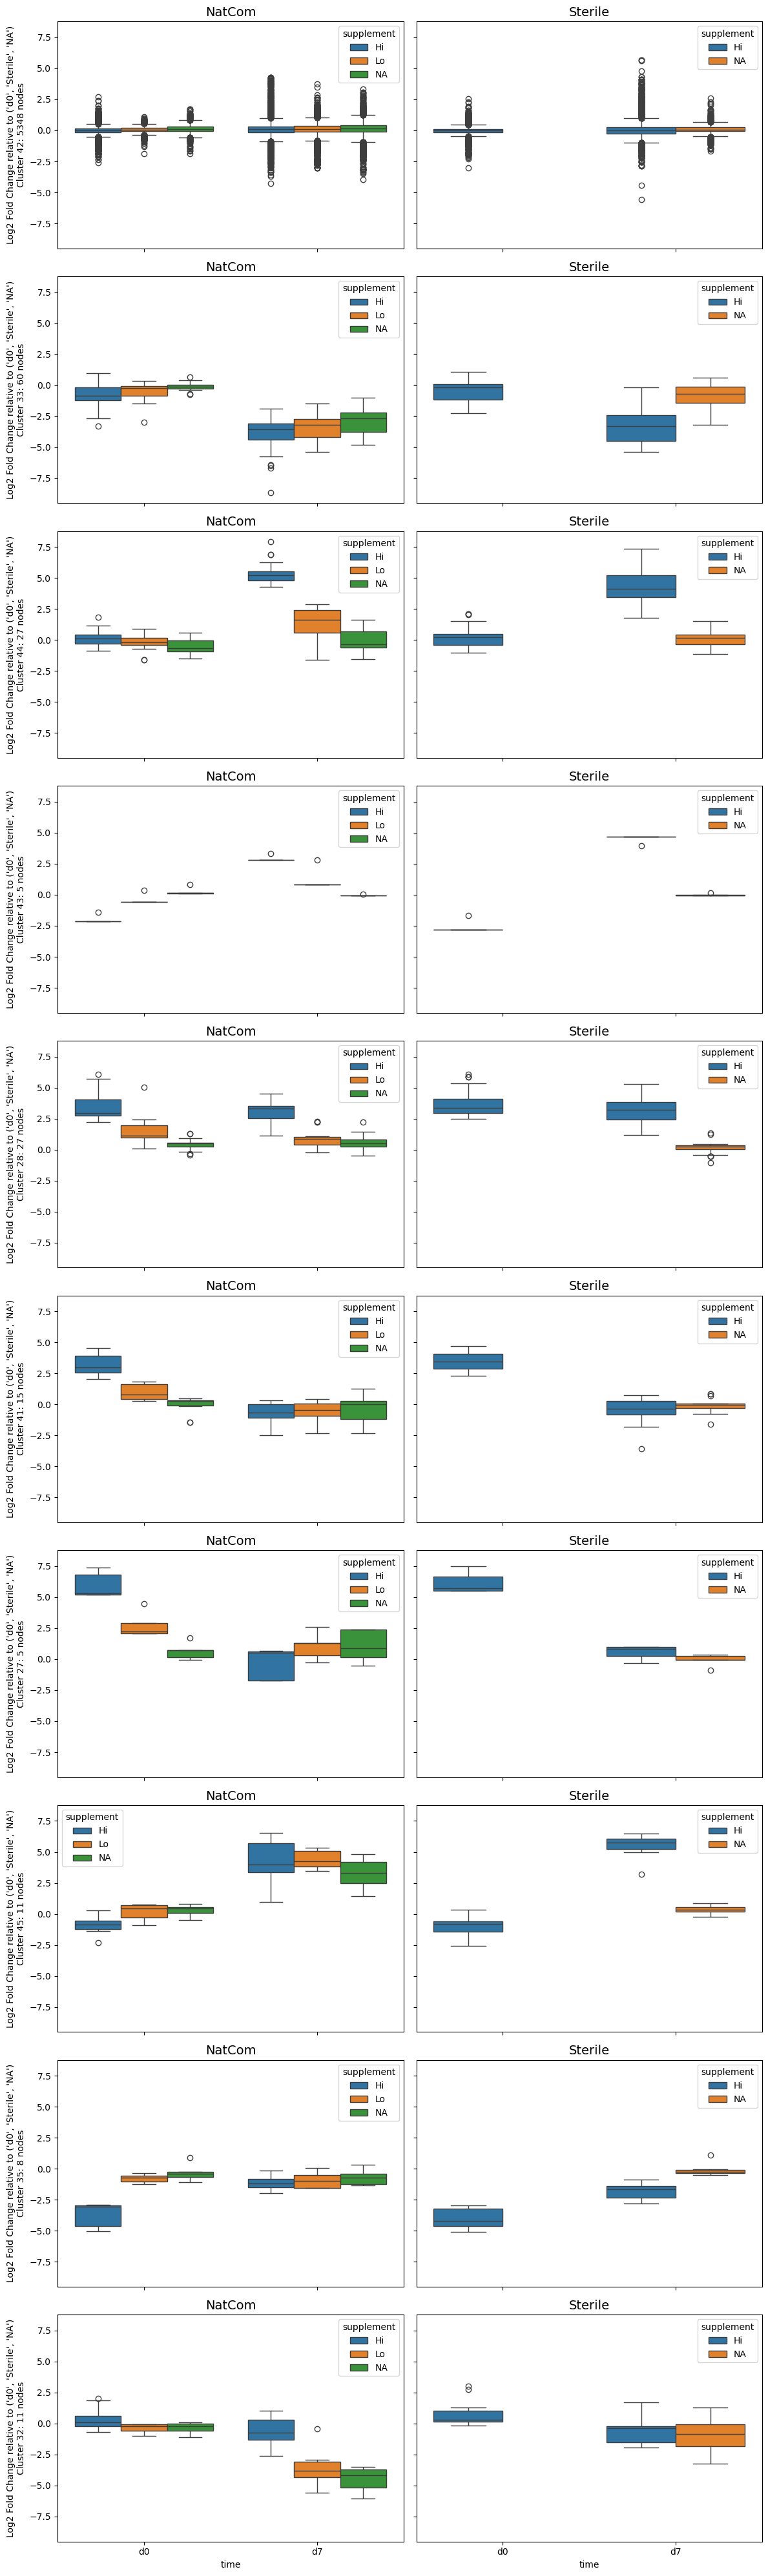

In [10]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as sch

# Normalize the columns of d_sample
# scaler = StandardScaler()
# d_sample_scaled = scaler.fit_transform(d_sample)

d_sample_scaled = d_sample.apply(lambda x: np.log2(x / d_sample.loc[('d0', 'Sterile', 'NA')]),axis=1)
d_sample_scaled = d_sample_scaled.drop(('d0', 'Sterile', 'NA'))

# Compute the distance matrix
d_sample_dist = sch.distance.pdist(d_sample_scaled.T)
d_sample_linkage = sch.linkage(d_sample_dist, method='average')

# Form clusters from the hierarchical clustering
max_d = 5
  # max_d is the maximum distance to form cluster. You can adjust this value
clusters = fcluster(d_sample_linkage, max_d, criterion='distance')
n = len(pd.unique(clusters))
print(n)
# Create a DataFrame from the scaled data
d_sample_scaled_df = pd.DataFrame(d_sample_scaled.T, index=d_sample.columns, columns=d_sample.index)



# Add the cluster labels to the DataFrame
# d_sample_scaled_df['cluster'] = clusters
min_nodes=5
cols = d_sample_scaled_df.T.columns
num_rows = 0
for my_cluster in pd.unique(clusters):
    my_cols = cols[clusters==my_cluster]
    if len(my_cols)<min_nodes:
        continue
    num_rows += 1
print(num_rows)
fig,ax = plt.subplots(figsize=(12, 4*num_rows),ncols=2,nrows=num_rows,sharey=True,sharex=True)
ax = ax.flatten()
counter = 0
save_clusters = []
for my_cluster in pd.unique(clusters):
    my_cols = cols[clusters==my_cluster]
    if len(my_cols)<min_nodes:
        continue
    save_clusters.append(my_cluster)
    d = d_sample_scaled_df.T[my_cols].copy()
    d.reset_index(inplace=True,drop=False)
    d['community-supplement'] = d.apply(lambda row: row['community'] + '-' + row['supplement'],axis=1)
    d = d.melt(id_vars=['time','community','supplement','community-supplement'], var_name='node_id', value_name='value')
    # d['community-supplement'] = d['community-supplement'].astype(str)
    for g in ['NatCom','Sterile']:
        sns.boxplot(x='time', y='value', hue='supplement',data=d[d['community']==g],ax=ax[counter])
        ax[counter].set_title(g,fontsize=14)
        if g=='NatCom':
            ax[counter].set_ylabel("Log2 Fold Change relative to ('d0', 'Sterile', 'NA')\nCluster %d: %d nodes"%(my_cluster,len(my_cols)))
        counter += 1
plt.tight_layout()
plt.show()

In [30]:
t_melted

,time,community,supplement,node_id,value
0,d0,NatCom,Hi,451.0,0.065151
1,d0,NatCom,Lo,451.0,0.457205
2,d0,NatCom,NA,451.0,0.760931
3,d0,Sterile,Hi,451.0,-0.079763
4,d7,NatCom,Hi,451.0,3.563446
...,...,...,...,...,...
1120,d7,NatCom,Hi,1126.0,0.184750
1121,d7,NatCom,Lo,1126.0,0.206625
1122,d7,NatCom,NA,1126.0,0.187144
1123,d7,Sterile,Hi,1126.0,0.151777


IndexError: index 56 is out of bounds for axis 0 with size 56

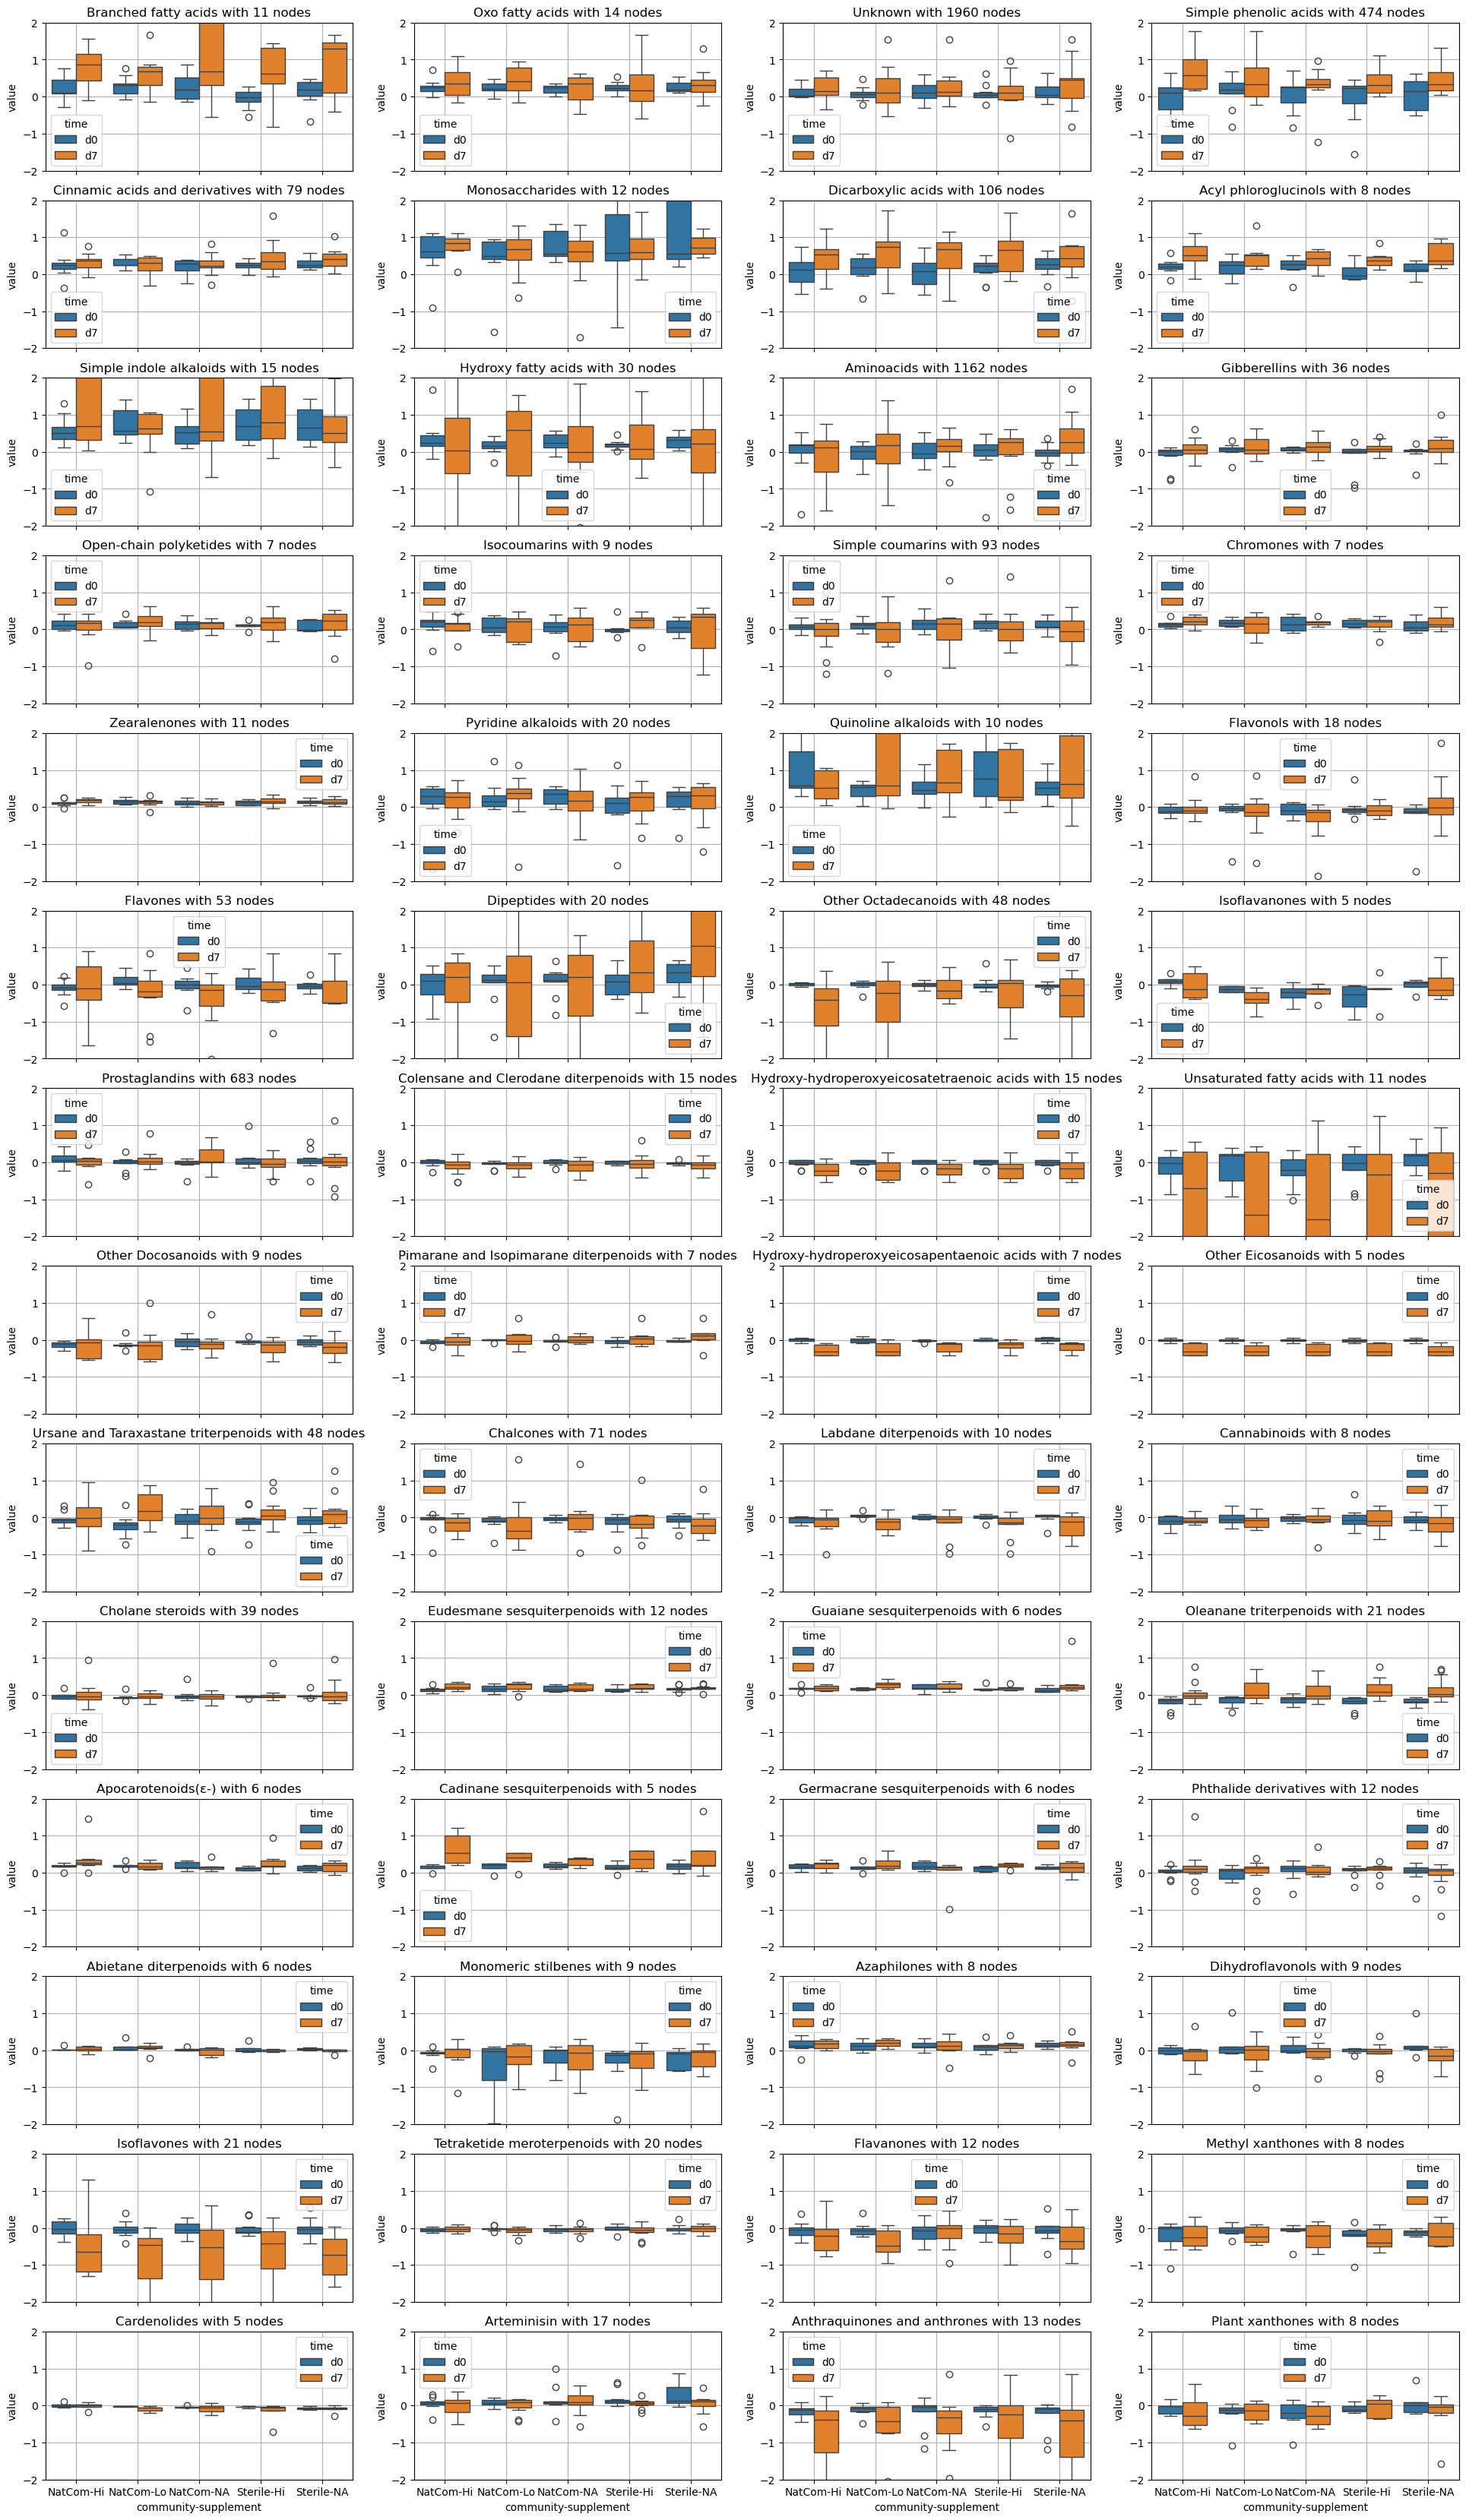

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Assuming `t` is your DataFrame with a MultiIndex
linestyles = ['-', '--']  # Define the linestyles you want to use
# stacked bar chart for each environment/depth.  Each stack will be a compound class.
# class_level = 'pathway_results_propagated'
# class_level='superclass_results_propagated'
class_level='class_results_propagated'

df[class_level] = df[class_level].fillna('Unknown')
u_class = df[class_level].unique()
plotted_count = 0
for u in u_class:
    my_nodes = df[df[class_level]==u]['node_id'].tolist()
    my_nodes = list(set(my_nodes) & set(d_sample_scaled.columns))
    if len(my_nodes)>min_nodes:
        plotted_count += 1
nrows=int(np.ceil(plotted_count/4))
fig,ax = plt.subplots(nrows=nrows,ncols=4,figsize=(24,nrows*3),sharex=True,sharey=False)
ax = ax.flatten()
counter = 0
for u in u_class:
    my_nodes = df[df[class_level]==u]['node_id'].tolist()
    my_nodes = list(set(my_nodes) & set(d_sample_scaled.columns))
    if len(my_nodes)<min_nodes:
        continue
    t = d_sample_scaled[my_nodes]
    t_melted = t.reset_index().melt(id_vars=t.index.names)

    t_melted['community-supplement'] = d.apply(lambda row: row['community'] + '-' + row['supplement'],axis=1)

    # sns.violinplot(t_melted,x='environment',y='value',hue='depth',ax=ax[counter],split=True)
    sns.boxplot(t_melted,x='community-supplement',y='value',hue='time',ax=ax[counter])
    # ax[counter].set_ylim(-0.1,1.1)
    ax[counter].set_title('%s with %d nodes'%(u,len(my_nodes)))
    ax[counter].set_ylim(-2,2)
    ax[counter].grid()
    # ax[counter].get_legend().remove()
    counter += 1


# t_melted = t.reset_index().melt(id_vars=t.index.names)
# t_melted

/tmp/ipykernel_484468/399902224.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10')
/tmp/ipykernel_484468/399902224.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20')
/tmp/ipykernel_484468/399902224.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20')


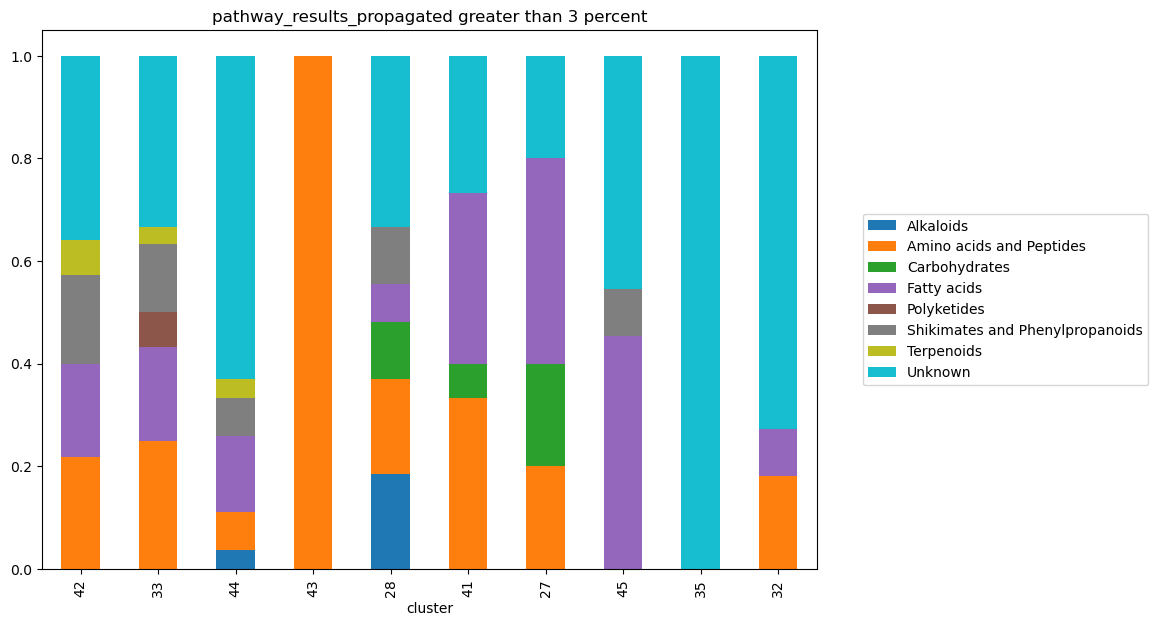

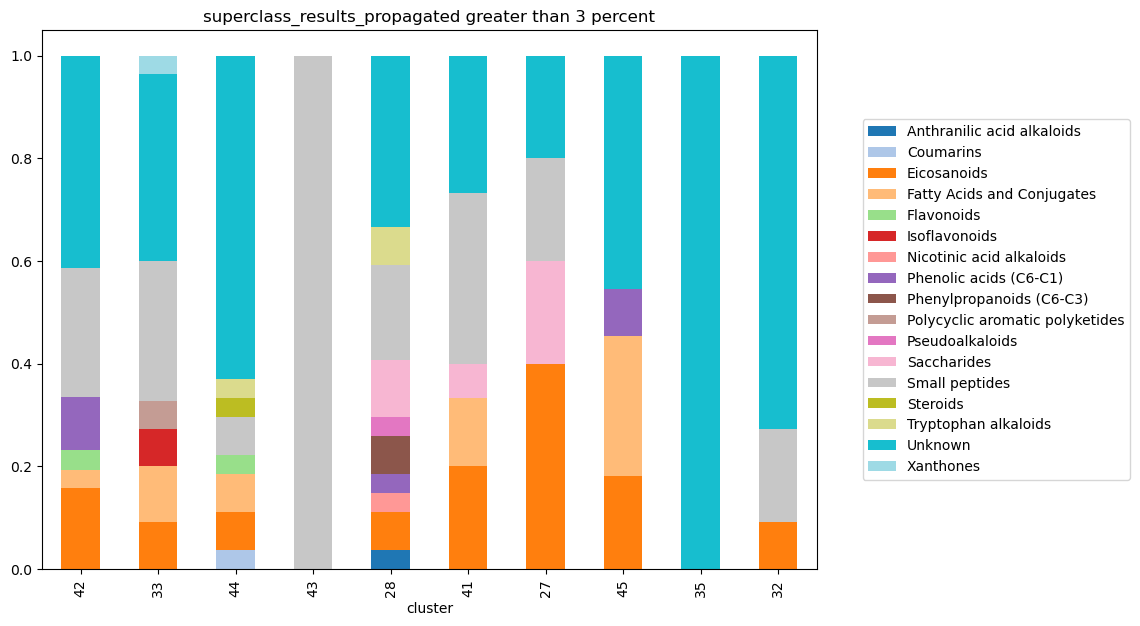

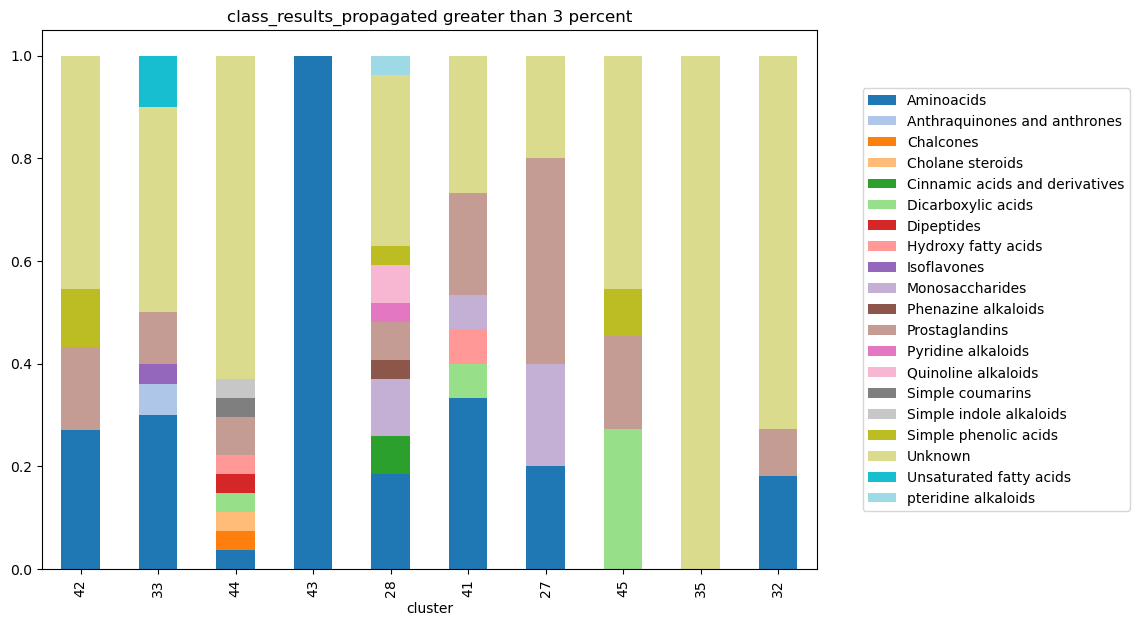

In [26]:

import matplotlib.cm as cm
min_val = 0.03
counter = 0
for cluster_col in ['pathway_results_propagated','superclass_results_propagated','class_results_propagated']:
    t = []
    fig,ax = plt.subplots(figsize=(12,2))#,nrows=1,ncols=1,sharex=True)

    for my_cluster in save_clusters:
        my_cols = cols[clusters==my_cluster]
        temp = df.loc[df['node_id'].isin(my_cols),cluster_col]
        temp.fillna('Unknown',inplace=True)
        temp = temp.value_counts()
        temp = temp / temp.sum()
        temp = temp[temp>min_val]
        temp = temp / temp.sum()
        temp = temp.to_frame()
        temp['cluster'] = my_cluster
        t.append(temp)
    t = pd.concat(t)
    t.reset_index(inplace=True,drop=False)
    t = pd.pivot_table(t,index=cluster_col,columns='cluster',values='count',fill_value=0)
    t = t[save_clusters]
# New code for using a colormap
    if t.shape[0]>10:
        colormap = cm.get_cmap('tab20')
    else:
        colormap = cm.get_cmap('tab10')
    colors = [colormap(i) for i in np.linspace(0, 1, t.shape[0])]

    t.T.plot(kind='bar', stacked=True, figsize=(10, 7),ax=ax, color=colors)
    ax.set_title('%s greater than %d percent'%(cluster_col,100*min_val))
    legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Move the legend outside the plot area
    legend.set_bbox_to_anchor((1.05, 0.5))
    

plt.show()



In [34]:

# node_data.columns = ['Quant: %s'%c for c in node_data.columns]
backup_G = G.copy()
t = d_sample_scaled_df.copy()
t.columns = ['-'.join(c) for c in t.columns]
t['cluster'] = clusters

nx.set_node_attributes(backup_G, t.to_dict('index'))
nx.write_graphml(backup_G,'wavestab3-with-cluster-log2.graphml')

In [31]:
t = d_sample_scaled_df.copy()
t['cluster'] = clusters
t.columns = ['-'.join(x) for x in t.columns]
t = pd.merge(t,df,left_index=True,right_on='node_id',how='left')
t.to_csv('clustered_nodes_wavestab3_lognorm.csv',index=None)

In [60]:
t = d_sample_scaled_df.copy()
t.columns = ['-'.join(c) for c in t.columns]
t['cluster'] = clusters
t = t[t['cluster']==50]
t = pd.merge(t,df,left_index=True,right_on='node_id',how='left')
t = t['superclass_results'].value_counts() / t.shape[0]
print(t)

superclass_results
Fatty Acids and Conjugates    0.082569
Tryptophan alkaloids          0.032110
Phenolic acids (C6-C1)        0.018349
Small peptides                0.018349
Octadecanoids                 0.018349
Sesquiterpenoids              0.009174
Saccharides                   0.009174
Meroterpenoids                0.004587
Fatty amides                  0.004587
Cyclic polyketides            0.004587
Monoterpenoids                0.004587
Fatty esters                  0.004587
Macrolides                    0.004587
Name: count, dtype: float64


<Axes: xlabel='time', ylabel='value'>

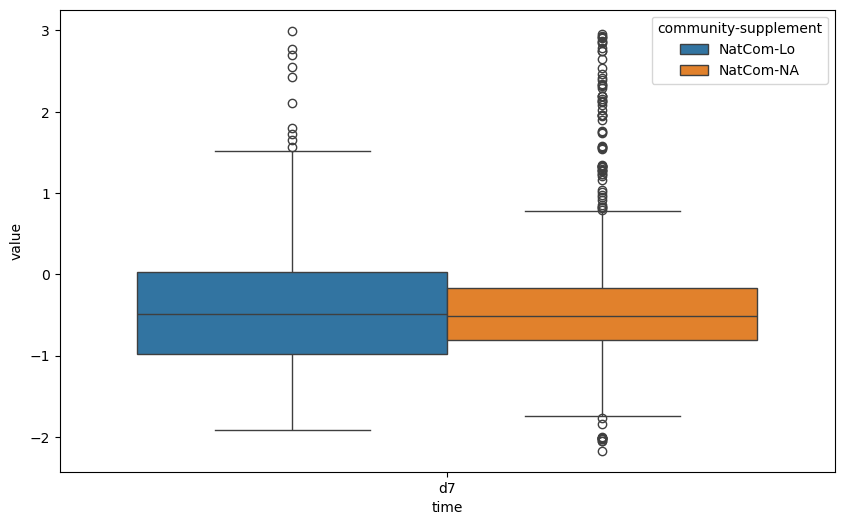

In [41]:

# Melt the DataFrame to long format for seaborn
# include the index in the melt

idx = d['cluster']==1

# # Create a boxplot for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='value', hue='community-supplement',data=d[idx])
# plt.xlabel('Cluster')
# plt.ylabel('Value')
# plt.title('Boxplot of Each Cluster')
# plt.show()

In [ ]:
out['time'].unique(),out['community'].unique(),out['supplement'].unique()

In [ ]:
def setup_dataframe(out):
    d = out.pivot_table(columns=['filename'],index=['node_id'],values='peak_area',aggfunc='mean',fill_value=300)
    # temp = d.T
    # temp.columns = [f"{index[1]}-{index[0]}" for index in temp.columns]
    d = d.apply(shannon_diversity_index,axis=0)
    d = d.to_frame()
    d.reset_index(inplace=True,drop=False)
    d.rename(columns={0:'diversity'},inplace=True)
    d['time'] = d['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-2])
    d['community'] = d['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-3])
    d['supplement'] = d['filename'].apply(lambda x: x.split('/')[-1].split('_')[12].split('-')[-1])
   
    # Make treatment a categorical variable and put it in order
    # c = ['unbdp', 'omt', 'grass', 'cmt', 'rwc']
    # c = [cc.upper() for cc in c]
    # d['treatment'] = pd.Categorical(d['treatment'], categories=c, ordered=True)
    return d


def shannon_diversity_index(m,threshold=1e6,q=2):
    # m = m>threshold
    # m = m**0.5
    # probabilities = m / m.sum()
    # shannon_diversity_index = -np.sum(probabilities * np.log2(probabilities))
    # return shannon_diversity_index
    probabilities = m / m.sum()
    hill_number = np.sum(probabilities**q)**(1/(1-q))
    return hill_number

d = setup_dataframe(out)

# # Plot the boxplot
import seaborn as sns
fig, ax = plt.subplots()
sns.boxplot(data=d, x='supplement', y='diversity', hue='time', ax=ax)

# sns.boxplot(data=d, x='treatment', y='shannon_diversity_index', hue='depth', ax=ax, order=['unbdp', 'omt', 'grass', 'cmt', 'rwc'])

# fig,ax = plt.subplots()
# sns.boxplot(data=d,x='treatment',y='shannon_diversity_index',hue='depth',ax=ax)



In [ ]:
# # pd.pivot_table(out[out['sampletype'].str.contains('UNBDP')],index='node_id',columns='filename',values='peak_area')
# temp = out[out['supplement']=='Hi'].copy()
# # temp['community'].unique()
# len(pd.unique(temp['node_id']))
out['supplement'].unique()
# d

In [ ]:
from scipy import stats

d = out.pivot_table(columns='node_id',index=['filename','time','community','supplement'],values='peak_area',aggfunc='mean',fill_value=300)
t_cols = ['d0','d7']
# (array(['d7', 'd0', 'NA'], dtype=object),
#  array(['NatCom', 'Sterile', 'NA'], dtype=object),
#  array(['Lo', 'NA', 'Hi'], dtype=object))


comparisons = [{'supplement':'Hi','community':'NatCom'},
                {'supplement':'Lo','community':'NatCom'},
                {'supplement':'Hi','community':'Sterile'},
                {'supplement':'NA','community':'Sterile'},
                {'supplement':'NA','community':'NatCom'}]

for comp in comparisons:
    print(comp)
    idx1 = d.index.get_level_values('time').isin(t_cols)
    idx2 = d.index.get_level_values('community')==comp['community']
    idx3 = d.index.get_level_values('supplement')==comp['supplement']
    temp = d[(idx1) & (idx2) & (idx3)].copy()

    stats_df = []

    for c in temp.columns:
        v = temp[c].values
        g = temp.index.get_level_values('time').values
        t_score, p_value = stats.ttest_ind(v[g=='d0'], v[g=='d7'])
        d7_mean = np.mean(v[g=='d7'])
        d0_mean = np.mean(v[g=='d0'])
        fold_change = np.log2((1+d7_mean)/(1+d0_mean))
        stats_df.append({'node_id':c,
                        'p_value':p_value,
                        't_score':t_score,
                        'fold_change':fold_change,
                        'd0_mean':d0_mean,
                        'd7_mean':d7_mean})
        
    stats_df = pd.DataFrame(stats_df)
    stats_df.to_csv('supplement-%s_community-%s.csv'%(comp['supplement'],comp['community']),index=None)


In [ ]:
stats_df

In [ ]:
import matplotlib.pyplot as plt
stats_df['max_intensity'] = stats_df[['d0_mean','d7_mean']].max(axis=1)
stats_df['max_intensity'] = stats_df['max_intensity'].apply(np.log10)
# Set the significance threshold for p-values
# significance_threshold = 0.05
intensity_threshold = 7
# Create the volcano plot
# idx = stats_df['p_value'] >= significance_threshold
# plt.scatter(stats_df['fold_change'], -1 * np.log10(stats_df['p_value']), c=stats_df['max_intensity'], alpha=1)
idx = stats_df['max_intensity'] > intensity_threshold
plt.scatter(stats_df[idx]['fold_change'],
            -1 * np.log10(stats_df[idx]['p_value']),
            c=stats_df[idx]['max_intensity'], alpha=1)

# Add labels and title
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 p-value')
plt.title('Volcano Plot')

# Add a horizontal line for the significance threshold
plt.axhline(-1 * np.log10(significance_threshold), color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.colorbar(label='log10(max_intensity)')
plt.clim(intensity_threshold, 10)
plt.xlim(-20,20)
# Show the plot
plt.show()


In [ ]:
import pingouin as pg
from scipy import stats

d = out[out['time']=='d7'].pivot_table(columns='node_id',index=['filename','time'],values='peak_area',aggfunc='mean',fill_value=300)
# d.reset_index(inplace=True,drop=False)
# d.shape,len(cluster_strings),Z.shape
# Perform t-test for each column in d
# ttest_results = d.apply(lambda x: pg.pairwise_ttests(x, group=d.index.get_level_values('time')))
cols = d.columns

# pg.pairwise_ttests(d[cols[0]])#, group=d.index.get_level_values('time'))
# Print the t-test results
# print(ttest_results)\

p_values = []
t_scores = []
fold_changes = []

for c in cols:
    v = d[c].values
    g = d.index.get_level_values('time').values
    t_score, p_value = stats.ttest_ind(v[g=='d0'], v[g=='d7'])
    fold_change = np.log2((1+np.mean(v[g=='d7']))/(1+np.mean(v[g=='d0'])))
    p_values.append(p_value)
    t_scores.append(t_score)
    fold_changes.append(fold_change)

stats_df = pd.DataFrame(index=d.T.index,data={'p_value':p_values,'t_score':t_scores,'fold_change':fold_changes})
stats_df.head()

In [ ]:
import pingouin as pg
from scipy import stats

# d = out[out['supplement']=='Hi'].pivot_table(columns='node_id',index=['filename','time'],values='peak_area',aggfunc='mean',fill_value=300)
d = out[out['time']=='d7'].pivot_table(columns='node_id',index=['filename','supplement'],values='peak_area',aggfunc='mean',fill_value=300)

# d.reset_index(inplace=True,drop=False)
# d.shape,len(cluster_strings),Z.shape
# Perform t-test for each column in d
# ttest_results = d.apply(lambda x: pg.pairwise_ttests(x, group=d.index.get_level_values('time')))
cols = d.columns

# pg.pairwise_ttests(d[cols[0]])#, group=d.index.get_level_values('time'))
# Print the t-test results
# print(ttest_results)\

p_values = []
t_scores = []
fold_changes = []

for c in cols:
    v = d[c].values
    g = d.index.get_level_values('supplement').values
    t_score, p_value = stats.ttest_ind(v[g=='NA'], v[g=='Hi'])
    fold_change = np.log2((1+np.mean(v[g=='Hi']))/(1+np.mean(v[g=='NA'])))
    p_values.append(p_value)
    t_scores.append(t_score)
    fold_changes.append(fold_change)

stats_df = pd.DataFrame(index=d.T.index,data={'p_value':p_values,'t_score':t_scores,'fold_change':fold_changes})
stats_df.head()

In [ ]:
fig,ax = plt.subplots()
ax.plot(stats_df['fold_change'],-1*np.log10(stats_df['p_value']),'.')
ax.set_xlabel('fold change')
ax.set_ylabel('-log10(p-value)')
ax.axhline(-1*np.log10(0.05),color='r',linestyle='--')
ax.axvline(-1,color='r',linestyle='--')
ax.axvline(+1,color='r',linestyle='--')
# ax.set_xlim(-16,16)
plt.show()


In [ ]:
d

In [ ]:
import pingouin as pg
from scipy import stats

d = out[out['supplement']=='Hi'].pivot_table(columns='node_id',index=['filename','time'],values='peak_area',aggfunc='mean',fill_value=300)
# d.reset_index(inplace=True,drop=False)
# d.shape,len(cluster_strings),Z.shape
# Perform t-test for each column in d
# ttest_results = d.apply(lambda x: pg.pairwise_ttests(x, group=d.index.get_level_values('time')))
cols = d.columns

# pg.pairwise_ttests(d[cols[0]])#, group=d.index.get_level_values('time'))
# Print the t-test results
# print(ttest_results)\

p_values = []
t_scores = []
fold_changes = []

for c in cols:
    v = d[c].values
    g = d.index.get_level_values('time').values
    t_score, p_value = stats.ttest_ind(v[g=='d0'], v[g=='d7'])
    fold_change = np.log2((1+np.mean(v[g=='d7']))/(1+np.mean(v[g=='d0'])))
    p_values.append(p_value)
    t_scores.append(t_score)
    fold_changes.append(fold_change)

stats_df_nldm = pd.DataFrame(index=d.T.index,data={'p_value':p_values,'t_score':t_scores,'fold_change':fold_changes})
stats_df_nldm.head()


In [ ]:
d = out.pivot_table(columns='node_id',index=['filename','sampletype','supplement','time'],values='peak_area',aggfunc='mean',fill_value=300)
cols = d.columns
d.reset_index(inplace=True,drop=False)
d = d.groupby(['sampletype','supplement','time'])[cols].mean()
d = d.T
d.columns = [f"{index[0]}:{index[1]}:{index[2]}" for index in d.columns]
d = pd.merge(d,stats_df.add_suffix('_sterile-vs-Hi'),left_index=True,right_index=True)
d = pd.merge(d,stats_df_nldm.add_suffix('_Hi-d0-vs-Hi-d7'),left_index=True,right_index=True)
d.to_csv('Pairwise-ttests-sterile-vs-Hi_with_NLDM-0-vs-7.csv')

In [ ]:
import pingouin as pg
from scipy import stats

d = out[out['supplement']!='Hi'].pivot_table(columns='node_id',index=['filename','supplement'],values='peak_area',aggfunc='mean',fill_value=300)
# d.reset_index(inplace=True,drop=False)
# d.shape,len(cluster_strings),Z.shape
# Perform t-test for each column in d
# ttest_results = d.apply(lambda x: pg.pairwise_ttests(x, group=d.index.get_level_values('time')))
cols = d.columns

# pg.pairwise_ttests(d[cols[0]])#, group=d.index.get_level_values('time'))
# Print the t-test results
# print(ttest_results)\

p_values = []
t_scores = []
fold_changes = []

for c in cols:
    v = d[c].values
    g = d.index.get_level_values('supplement').values
    t_score, p_value = stats.ttest_ind(v[g=='Day0'], v[g=='Day7'])
    fold_change = np.log2((1+np.mean(v[g=='Day7']))/(1+np.mean(v[g=='Day0'])))
    p_values.append(p_value)
    t_scores.append(t_score)
    fold_changes.append(fold_change)

stats_df_potting = pd.DataFrame(index=d.T.index,data={'p_value':p_values,'t_score':t_scores,'fold_change':fold_changes})
stats_df_potting.head()

In [ ]:
stats_df[(stats_df['p_value']<0.05) & (stats_df['fold_change']<-0.5)]

In [ ]:
fig,ax = plt.subplots()
ax.plot(stats_df['fold_change'],-1*np.log10(stats_df['p_value']),'.')
ax.set_xlabel('fold change')
ax.set_ylabel('-log10(p-value)')
ax.axhline(-1*np.log10(0.05),color='r',linestyle='--')
ax.axvline(-1,color='r',linestyle='--')
ax.axvline(+1,color='r',linestyle='--')
# ax.set_xlim(-16,16)
plt.show()


In [ ]:
fig,ax = plt.subplots()
ax.plot(stats_df_potting['fold_change'],-1*np.log10(stats_df_potting['p_value']),'.')
ax.set_xlabel('fold change')
ax.set_ylabel('-log10(p-value)')
ax.axhline(-1*np.log10(0.05),color='r',linestyle='--')
ax.axvline(-1,color='r',linestyle='--')
ax.axvline(+1,color='r',linestyle='--')
# ax.set_xlim(-16,16)
plt.show()


In [ ]:
stats_df = stats_df_potting.add_suffix('_potting').join(stats_df.add_suffix('_omt'),how='outer')

In [ ]:
G = nx.read_graphml('../data/network.graphml')
df = dict(G.nodes(data=True))
df = pd.DataFrame(df).T
df.index.name = 'node_id'
df = pd.merge(df,stats_df,left_index=True,right_index=True,how='inner')
df.to_csv('network_data_with_stats_RR-OMT-SunshineMix.csv')


In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')

numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

correlation_matrix[['fold_change_omt','fold_change_potting']]

In [ ]:
stats_df.to_csv('RR_and_Sunshine_priming_wavestab3.csv')

In [ ]:

# node_data.columns = ['Quant: %s'%c for c in node_data.columns]
backup_G = G.copy()
nx.set_node_attributes(backup_G, stats_df.to_dict('index'))
nx.write_graphml(backup_G,'../data/network_RR-Sunshine-priming-WaveStab3-Stats.graphml')

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
# d = setup_dataframe(out)
d = out.pivot_table(index='node_id',columns=['time','community','supplement'],values='peak_area',aggfunc='mean',fill_value=300)
d.columns = ['-'.join(index) for index in d.columns]

cluster_strings = list(d.columns)#[os.path.basename(c).split('_')[12] for c in d.index]

# Perform hierarchical clustering
Z = linkage(d.T.apply(lambda x: x**0.5), method='ward', metric='euclidean')
import matplotlib.pyplot as plt
# Plot the dendrogram
plt.figure(figsize=(20, 3))

clusters = fcluster(Z, 4e4, criterion='distance')
# d['cluster'] = clusters
# cluster_strings = [f"{index[1]}-{index[0]} Cluster {cluster}" for index, cluster in zip(d.index, d['cluster'])]
# cluster_strings = [f"{index} Cluster {cluster}" for index, cluster in zip(d.index, d['cluster'])]

dendrogram(Z, labels=cluster_strings, leaf_font_size=14,color_threshold=4e4,)
# Set plot title and labels
# plt.title("Dendrogram with Depth and Environment Labels")
# plt.xlabel("Samples", fontsize=14)
plt.ylabel("Distance", fontsize=14)

# Set y tick label fontsize
plt.yticks(fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)


# Show the plot
plt.show()


In [ ]:
# from rdkit import Chem
# from rdkit.Chem import Draw
# mz = nx.get_node_attributes(G, 'precursor_mz')
# smiles_identity = nx.get_node_attributes(G, 'smiles_identity')
# temp = d.T.copy()
# c1 = 'soil-CentExp-OMT1d2-1130buck-50g'
# c2 = 'soil-Sunshine-Mix4-NA-water'
# temp['fold_change'] = np.log2(temp[c1]/temp[c2])
# temp = pd.merge(temp,pd.DataFrame({'precursor_mz':mz}),left_index=True,right_index=True)

# temp = pd.merge(temp,pd.DataFrame({'smiles_identity':smiles_identity}),left_index=True,right_index=True)
# p = temp[pd.notna(temp['smiles_identity'])]

# p.sort_values('fold_change',ascending=False,inplace=True)
# top_10 = p.head(20)
# bottom_10 = p.tail(20)

# top_mols = [Chem.MolFromSmiles(smiles) for smiles in top_10['smiles_identity']]
# bottom_mols = [Chem.MolFromSmiles(smiles) for smiles in bottom_10['smiles_identity']]
# mols = top_mols + bottom_mols
# image = Draw.MolsToGridImage(mols, subImgSize=(200,200),molsPerRow=10,maxMols=1000,useSVG=True)
# image

In [ ]:
# mz = nx.get_node_attributes(G, 'precursor_mz')
# smiles_identity = nx.get_node_attributes(G, 'smiles_identity')

# temp = d.T.copy()
# c1 = 'soil-CentExp-OMT1d2-1130buck-50g'
# c2 = 'soil-Sunshine-Mix4-NA-water'
# temp['fold_change'] = np.log2(temp[c1]/temp[c2])

# temp = pd.merge(temp,pd.DataFrame({'precursor_mz':mz}),left_index=True,right_index=True)
# temp = pd.merge(temp,pd.DataFrame({'smiles_identity':smiles_identity}),left_index=True,right_index=True)
# # p = d[pd.notna(d['smiles_identity'])]
# p = temp.copy()
# fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(15,5),sharey=True,sharex=True)
# ax.vlines(p['precursor_mz'], 0, p[c1]**0.5)
# ax.vlines(p['precursor_mz'], 0, -1*(p[c2]**0.5))
# # ax[1].vlines(p['precursor_mz'], 0, p['fold_change'])
# # ax[2].vlines(p['precursor_mz'], 0, ymax=-1*(p[2]**0.5))

# # ax.set_ylim(-50000,50000)
# ax.grid(True)
# ax.set_xlim(50,650)


In [ ]:
# mz = nx.get_node_attributes(G, 'precursor_mz')
# smiles_identity = nx.get_node_attributes(G, 'smiles_identity')

# temp = d.T.copy()
# c1 = 'soil-CentExp-OMT1d2-1130buck-50g'
# c2 = 'soil-Sunshine-Mix4-NA-water'
# temp['fold_change'] = np.log2(temp[c1]/temp[c2])

# temp = pd.merge(temp,pd.DataFrame({'precursor_mz':mz}),left_index=True,right_index=True)
# temp = pd.merge(temp,pd.DataFrame({'smiles_identity':smiles_identity}),left_index=True,right_index=True)
# # p = d[pd.notna(d['smiles_identity'])]
# p = temp.copy()
# fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(15,11),sharey=True,sharex=True)
# ax[0].vlines(p['precursor_mz'], 0, p['fold_change'])


# p = temp[pd.notna(temp['smiles_identity'])]
# ax[1].vlines(p['precursor_mz'], 0, p['fold_change'])
# # ax[2].vlines(p['precursor_mz'], 0, ymax=-1*(p[2]**0.5))


# # for a in ax:
#     # a.set_xlim(270,330)


In [ ]:
df


In [ ]:
mcs_structural_cluster_number = nx.get_node_attributes(G, 'mcs_structural_cluster_number')
smiles_identity = nx.get_node_attributes(G, 'smiles_identity')

temp = pd.DataFrame({'cluster':mcs_structural_cluster_number})
temp = pd.merge(temp,pd.DataFrame({'smiles':smiles_identity}),left_index=True,right_index=True)
temp.fillna('',inplace=True)
sig_out = []
val_out = []
for i in temp['cluster'].unique():
    df = pd.merge(out,temp,left_on='node_id',right_index=True)
    # df = df[df['depth']!='litter']
    # df = df[df['depth']!='b']
    # df = df[(df['environment']=='coniferousforests') | (df['environment']=='grasses') ]
    df = df[df['cluster']==i]
    cols = ['community','time','supplement','peak_area','filename','node_id']
    df = df[cols]
    df = df[df['community']=='NatCom']
    # df = df[df['time']=='1d2']
    df = df[df['supplement']=='Hi']
    # filename_mapping = {f: i+1 for i, f in enumerate(df['filename'].unique())}
    # df['filename'] = df['filename'].map(filename_mapping)

    # node_id_mapping = {f: i+1 for i, f in enumerate(df['node_id'].unique())}
    # df['node_id'] = df['node_id'].map(node_id_mapping)



    df = pd.pivot_table(df,values='peak_area',index=['filename','time'],columns=['node_id'],fill_value=300)
    df = df.mean(axis=1).to_frame()
    df.reset_index(inplace=True,drop=False)
    df.rename(columns={0:'peak_area'},inplace=True)
    anova_result = pg.anova(data=df, dv='peak_area', between=['time'])#, subject='filename')
    anova_result['structural_cluster'] = i
    sig_out.append(anova_result)
    # THERE IS A PROBLEM HERE.  OUT SHOULD BE FILTERED TO ONLY STRUCTURAL CLUSTERS
    v = out.groupby(['community','supplement','time'])['peak_area'].mean().to_frame().reset_index()
    v['structural_cluster'] = i
    val_out.append(v)
sig_out = pd.concat(sig_out)
val_out = pd.concat(val_out)
sig_out = pd.pivot_table(sig_out,values='p-unc',index=['structural_cluster'],columns=['Source'])
sig_out = sig_out[sig_out.min(axis=1)<0.05]
val_out = val_out.pivot_table(index='structural_cluster',columns=['community','supplement','time'],values='peak_area')
val_out.columns = ['_'.join(c) for c in val_out.columns]
val_out.reset_index(inplace=True,drop=False)
sig_out = pd.merge(sig_out,val_out,left_index=True,right_on='structural_cluster',how='inner')

In [ ]:
sig_out

In [ ]:
# node_data = pd.pivot_table(out,index=['node_id'],columns=['sampletype','depth'],values='peak_area',aggfunc=np.mean,fill_value=300)
# node_data.columns = ['_'.join(c) for c in node_data.columns]

# node_data.columns = ['Quant: %s'%c for c in node_data.columns]
# backup_G = G.copy()
# nx.set_node_attributes(backup_G, node_data.to_dict('index'))
# # nx.write_graphml(backup_G,'../data/network_omt-potting.graphml')

In [ ]:
node_data = pd.pivot_table(out[out['supplement']=='Hi'],index=['node_id'],columns=['filename','community','time','supplement'],values='peak_area',aggfunc=np.mean,fill_value=300)
node_data.columns = ['-'.join(c) for c in node_data.columns]

# node_data = node_data.apply(lambda  x: np.log10(x+1),axis=1)
# s = node_data.sum(axis=0).values
# m = s.mean()
# node_data.values[:,:] = m * (node_data.values[:,:]/s)
# node_data.columns = [c.split('/')[-1].split('_')[12] for c in node_data.columns]

# node_data.to_csv('../data/log10_averages_treatments.csv')
node_data.columns = ['Quant: %s'%c for c in node_data.columns]

n = node_data.copy()
m = n.min(axis=1)
m = n.values - m.values[:,None]
n = pd.DataFrame(m,index=n.index,columns=n.columns)

m = n.max(axis=1)
m = n.values / m.values[:,None]
n = pd.DataFrame(m,index=n.index,columns=n.columns)

n = n.T
n.index.name = 'group'
n.reset_index(inplace=True,drop=False)
n['group'] = n['group'].apply(lambda x: '-'.join(x.split('-')[-3:]))
n = n.groupby('group').mean()
n = n.T
n.head(40)

In [ ]:
node_data = pd.pivot_table(out,index=['node_id'],columns=['filename','community','time','supplement'],values='peak_area',aggfunc=np.mean,fill_value=300)
# node_data = pd.pivot_table(out[out['supplement']=='Hi'],index=['node_id'],columns=['filename','community','time','supplement'],values='peak_area',aggfunc=np.mean,fill_value=300)
node_data.columns = ['-'.join(c) for c in node_data.columns]

# node_data = node_data.apply(lambda  x: np.log10(x+1),axis=1)
# s = node_data.sum(axis=0).values
# m = s.mean()
# node_data.values[:,:] = m * (node_data.values[:,:]/s)
# node_data.columns = [c.split('/')[-1].split('_')[12] for c in node_data.columns]

# node_data.to_csv('../data/log10_averages_treatments.csv')
node_data.columns = ['Quant: %s'%c for c in node_data.columns]

n = node_data.copy()
m = n.min(axis=1)
m = n.values - m.values[:,None]
n = pd.DataFrame(m,index=n.index,columns=n.columns)

m = n.max(axis=1)
m = n.values / m.values[:,None]
n = pd.DataFrame(m,index=n.index,columns=n.columns)

n = n.T
n.index.name = 'group'
n.reset_index(inplace=True,drop=False)
n['group'] = n['group'].apply(lambda x: 'Quant: %s'%('-'.join(x.split('-')[-3:])))
n = n.groupby('group').mean()
n = n.T

original_index = nx.get_node_attributes(G, 'original_index')
mcs_structural_cluster_number = nx.get_node_attributes(G, 'mcs_structural_cluster_number')
mcs_structural_pattern = nx.get_node_attributes(G, 'mcs_structural_pattern')
smiles_identity = nx.get_node_attributes(G, 'smiles_identity')
# temp = {}
# for c in n.columns:
    # temp[c] = nx.get_node_attributes(backup_G, c)

temp = pd.merge(n,pd.DataFrame({'cluster_id':mcs_structural_cluster_number}),left_index=True,right_index=True)
temp = pd.merge(temp,pd.DataFrame({'cluster_pattern':mcs_structural_pattern}),left_index=True,right_index=True)
temp = pd.merge(temp,pd.DataFrame({'smiles_identity':smiles_identity}),left_index=True,right_index=True)
cols = [c for c in temp.columns if 'Quant' in c]
cluster_df = temp.groupby(['cluster_id','cluster_pattern'])[cols].mean()
identity_df = temp.groupby(['cluster_id','cluster_pattern','smiles_identity'])[cols].mean()


In [ ]:
cluster_df

In [ ]:
import seaborn as sns
cols = identity_df.columns
c = 0
x_labels = [col.replace('Quant: ','') for col in cols]
from PIL import Image
from io import BytesIO
from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol)#,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)

num_unique_clusters = identity_df.index.get_level_values('cluster_id').nunique()
print(num_unique_clusters)
n_cols = 4
n_rows = int(np.ceil(num_unique_clusters/n_cols))

fig,ax = plt.subplots(nrows=n_rows,ncols=4,figsize=(n_rows*4,n_cols*14),sharex=True,sharey=False)
                      
ax = ax.flatten()
for _,d in identity_df.reset_index(drop=False).groupby('cluster_id'):
    
    sns.heatmap(d[cols].values,ax=ax[c],cmap='viridis')
    ax[c].set_title('Cluster %d'%d.iloc[0]['cluster_id'])
    counter = 0
    for i, row in d.iterrows():

        mol = Chem.MolFromSmiles(row['smiles_identity'])
        d2d = Draw.MolDraw2DCairo(120, 120)
        dopts = d2d.drawOptions()
        dopts.setBackgroundColour((0, 0, 0, 0))
        im = show_mol(d2d, mol)

        imagebox = OffsetImage(im, zoom=0.8)
        ax[c].add_artist(AnnotationBbox(imagebox, (-1, counter+0.5), frameon=False,annotation_clip=False))#,box_alignment=(0,0)))
        
        counter += 1
    c += 1
    # if c>6:
        # break
    
plt.tight_layout()

# Set the x-axis labels for the bottom row of subplots
for i in range(n_cols):
    ax[-n_cols + i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=14)

# Set the x-axis label for the entire figure
# fig.text(0.5, 0.04, 'Identity', ha='center', fontsize=14)

plt.tight_layout()
fig.savefig('../data/identity_heatmap_RR-Sunshine-priming-WaveStab3.pdf')


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the pairwise distances between rows
# cols = [c for c in cluster_df.columns if ('deciduousforests' in c) | ('coniferousforests' in c)]
distances = cluster_df.values

# Perform hierarchical clustering
Z = linkage(distances, method='average', metric='euclidean')

# Get the order of the rows based on the clustering
order = dendrogram(Z, no_plot=True)['leaves']

# Reorder the rows of cluster_df
cluster_df = cluster_df.iloc[order]

# Show the reordered cluster_df
# cluster_df[cols]


In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from rdkit import Chem
from rdkit.Chem import Draw
# Create the polar plot
def make_polar_structural_cluster_plot(cluster_df,file_str=''):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15), subplot_kw={'projection': 'polar'})

    # Define the angles for each side of the polygons
    angles = np.linspace(0, 2 * np.pi, cluster_df.shape[0] + 1)[:-1]
    shift_amount = np.diff(angles)[0] / cluster_df.shape[1]
    for iii in range(cluster_df.shape[1]):
        # Define the lengths of the bars
        bar_lengths = cluster_df.values[:, iii]
        # Plot the bars
        ax.bar(angles + iii * shift_amount, bar_lengths*1, width=shift_amount, align='edge', alpha=0.74, label=cluster_df.columns[iii].replace('Quant: ',''))

    # Set the labels for each side of the polygons
    ax.set_xticks(angles)
    ax.set_xticklabels(['' for i in range(cluster_df.shape[0])])

    # Set the title of the plot
    tick_labels = ax.xaxis.get_ticklabels()

    m = ax.get_ylim()[1]*1.1
    ax.set_ylim(0, m)

    from PIL import Image
    from io import BytesIO
    def show_mol(d2d,mol,legend='',highlightAtoms=[]):
        d2d.DrawMolecule(mol)#,legend=legend, highlightAtoms=highlightAtoms)
        d2d.FinishDrawing()
        bio = BytesIO(d2d.GetDrawingText())
        return Image.open(bio)

    counter = 0
    for i, row in cluster_df.iterrows():
        mol = Chem.MolFromSmarts(i[1])
        s = Chem.MolToSmiles(mol)
        mol = Chem.MolFromSmiles(s)
        d2d = Draw.MolDraw2DCairo(120, 120)
        dopts = d2d.drawOptions()
        dopts.setBackgroundColour((0, 0, 0, 0))
        im = show_mol(d2d, mol)

        imagebox = OffsetImage(im, zoom=0.8)
        ax.add_artist(AnnotationBbox(imagebox, (angles[counter] + shift_amount*cluster_df.shape[1]/2, m * 1), frameon=False))
        # if np.cos(angles[counter]) < 0:
        # my_angle = angles[counter] + shift_amount*2 - np.pi
        # else:
        my_angle = angles[counter] + shift_amount* cluster_df.shape[1]/2
        # my_angle = angles[counter] + shift_amount*2
        my_angle = my_angle * 180/np.pi - 90
        ax.text(angles[counter] + shift_amount*cluster_df.shape[1]/2, m * 1.11, 'Cluster %d'%i[0], ha='center', va='center', fontsize=16, rotation=my_angle)#angles[counter]*180/4/np.pi)


        counter += 1

    ax.spines['polar'].set_visible(False)
    ax.grid(color='black')
    # Hide the y tick labels
    ax.set_yticklabels([])

    # Position the legend outside of the plot area
    ax.legend(bbox_to_anchor=(0.85, 1.1), loc='upper left',fontsize=16,frameon=False)

    plt.tight_layout()
    fig.savefig('lcms-structural_cluster_plot_%s.pdf'%file_str)#, dpi=300)

# cols = [c for c in cluster_df.columns if ('deciduousforests' in c) | ('coniferousforests' in c)]
# cols = [c for c in cluster_df.columns if ('OMT' in c) | ('CMT' in c)]
cols = [c for c in cluster_df.columns if ('Quant' in c)]
# cols = [c for c in cluster_df.columns if ('UNBDP' in c) | ('OMT' in c)]
make_polar_structural_cluster_plot(cluster_df[cols],'Century-Sunshine-Priming-Hi')